<a href="https://colab.research.google.com/github/rohitnikam1/Fastai-projects/blob/master/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, we are going to do a deep dive into the mechanics of deep learning. We will make the basic deep learning applications better and apply them to a wider variety of types of data.

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.3 MB/s 
     |████████████████████████████████| 1.2 MB 54.2 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
     |████████████████████████████████| 188 kB 59.1 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 51 kB 377 kB/s 
Mounted at /content/gdrive


# Classifying breeds of dogs and cats

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [ ]:
(path/'images').ls()

(#7393) [Path('images/pomeranian_93.jpg'),Path('images/boxer_106.jpg'),Path('images/samoyed_138.jpg'),Path('images/leonberger_165.jpg'),Path('images/great_pyrenees_36.jpg'),Path('images/american_pit_bull_terrier_88.jpg'),Path('images/Sphynx_115.jpg'),Path('images/basset_hound_180.jpg'),Path('images/wheaten_terrier_109.jpg'),Path('images/japanese_chin_53.jpg')...]

In [ ]:
fname = (path/'images').ls()[0]
fname.name

'pomeranian_93.jpg'

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pomeranian']

Creating Pets datablock

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


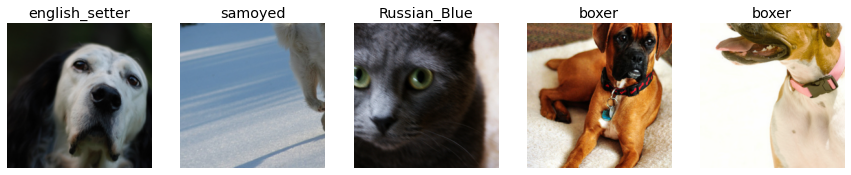

In [ ]:
dls.show_batch(nrows=1, ncols=5)

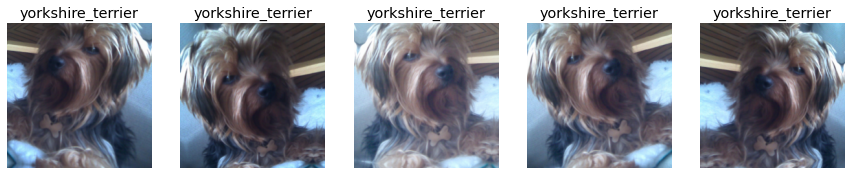

In [ ]:
dls.show_batch(nrows=1, ncols=5, unique=True)

As soon as we have a datablock, passing it through a model can help us clean it.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.470495,0.357573,0.115697,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.504886,0.333749,0.094723,01:15
1,0.326875,0.237706,0.065629,01:13


Here fastai automatically assigns the appropriate loss function to the learning.

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

## Cross entropy loss

Here we now look at the activations of our model. To actually get a batch of real data from our DataLoaders, we can use the method -- `one_batch`:

In [ ]:
x,y = dls.one_batch()

It returns the dependent and independent variables as a mini-batch.

In [ ]:
y

TensorCategory([31, 25, 28, 17, 21,  2, 24, 22, 22, 31, 35,  2, 30,  2, 33,  4, 10, 10, 32, 32,  0, 14, 23, 35, 30, 11, 13, 23, 20, 15, 29, 23, 30, 29,  3, 17, 24, 32, 17, 21,  6, 19, 21, 22,  0,  6, 10,  8,
        13, 31, 29,  6,  2, 16, 15, 27, 13, 10, 17, 22, 32,  7, 31, 32], device='cuda:0')

In [ ]:
dls.vocab[0]

'Abyssinian'

Our batch size is 64, so we have 64 rows in this tensor. Each row is a single integer representing our 37 possible pet breeds.

We can view the predictions (or the activations of the final layer of our neural network) using `Learner.get_preds`. This function takes a dataset index (0 for training and 1 for validation) or an iterator of batches. Thus, we can pass it a simple list with our batch to get our predictions. It returns predictions and targets by default, but since we already have the targets, we can ignore then by assigning them to the special variable `_`:

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.3248e-09, 1.6914e-10, 1.1679e-07, 2.1812e-09, 2.7037e-07, 6.0694e-10, 6.3247e-09, 1.0178e-07, 2.1919e-07, 1.2361e-09, 1.4992e-08, 4.1015e-09, 4.3156e-09, 2.4210e-09, 4.5862e-09, 3.9954e-09,
        2.7000e-10, 1.9852e-09, 2.8361e-10, 1.0318e-09, 2.4395e-10, 2.0028e-06, 2.9997e-09, 7.3041e-09, 1.7507e-06, 1.3833e-08, 4.6172e-09, 9.6788e-09, 3.8769e-06, 4.8810e-10, 2.6581e-09, 9.9999e-01,
        7.3972e-08, 5.2993e-06, 1.2343e-09, 2.0204e-09, 1.3377e-09])

In [21]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

To transform the activations of our model into predictions like this, we used Softmax activation function.

## Log likelihood

For binary classification, we define the loss function by applying sigmoid activation function to predictions and pass the results through `torch.where` function (as used in 3 vs. 7 handwritten digit classification in mnist_basics notebook). 


For classifying multiple categories, we cannot use `torch.where` anymore. We instead use indexing. For example for binary case:

In [22]:
targ = tensor([0,1,0,1,1,0])

and assume that the following are the softmax activations:

In [34]:
torch.random.manual_seed(42);

In [35]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [36]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [37]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

This is identical to `torch.where`

In [26]:
-sm_acts[idx, targ]

tensor([ 2.7693,  1.8528,  3.2589,  0.3833, -1.1862, -0.2126])

In [28]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([ 2.7693,  1.8528,  3.2589,  0.3833, -1.1862, -0.2126])

tensor([ 2.7693,  1.8528,  3.2589,  0.3833, -1.1862, -0.2126])

When we first take the softmax, and then log likelihood of that, that combination is called the **cross entropy loss**. For example, in PyTorch, `nn.CrossEntropyLoss` is the same as taking `log_softmax` and then `nll_loss`.

In [29]:
loss_func = nn.CrossEntropyLoss()

In [38]:
loss_func(acts, targ)

tensor(1.8045)

PyTorch provides loss functions in two forms. In the class seen above, and also a plain functional form, available in the `F` subspace:

In [39]:
F.cross_entropy(acts, targ)

tensor(1.8045)

By default, PyTorch takes the mean of loss of all items. To avoid that, we can use:

In [40]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])